# Mini Project Starter Code
This guide will help you to take a first step into deep learning, you will learn how manipulate your data and train your neural network. By the end of this guide, you should have your neural network model trained and saved on disk, and then you can use that model on real-time detection.

Most of the code in this guide has been implemented for you, and you have very little work to do here, because the goal is to help you get some quick experence on training your first neural network. If you have sufficient knowledge feel free to modify anything to achieve better performance. If you are a beginner, please carefully read the code in this notebook and try to understand, and follow all the steps.

Before starting, please make sure the following Python package are installed:
- NumPy
- OpenCV
- Tensorflow
- Matplotlib
- SciPy
- Pillow

Run the following code cell by clicking the "Run" button, make sure all modules can be imported.

In [2]:
import numpy as np
import random
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.misc import imresize
from utils import load_ubyte
from model import *
%matplotlib inline

## 1. Get the data

Please go to [MNIST official website](http://yann.lecun.com/exdb/mnist/) and download the following files:

- train-images-idx3-ubyte.gz
- train-labels-idx1-ubyte.gz
- t10k-images-idx3-ubyte.gz
- t10k-labels-idx1-ubyte.gz

These are the trainning data and testing data you will be using to train your neural
network on. Please put them in the same directory as this tutorial.

The data files has extension name of "gz", because they are in gzip compressed format, we need to decompress them first. The command for decompressing the first file is:
```bash
gzip -d train-images-idx3-ubyte.gz
```
Please decompress all data using this command, if you see an error, make sure gzip is correctly installed on your machine.

## 2. Load MNIST data
Once you decompressed all the above files, you'll find that the file extension "gz" are removed, now all data files are in the raw ubyte format. We need to load all data into NumPy array so that we can apply algorithms in NumPy, OpenCV, etc. To help you start, there is already a function called load_ubyte in utils.py that does the job for you.

We need to call load_ubyte to load our data, the first parameter should be the image file, and the second parameter should be the label file. Please run the cell below. This function might takes a long time to run depending on your machine, please be patient.

In [4]:
# Load the testing data:
test_x, test_y = load_ubyte('t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte')

load t10k-images-idx3-ubyte ...
load t10k-labels-idx1-ubyte ...


It is a good idea to take a deeper look at our data to make sure everything is correct. We want to check the structure, type and scale of the data. Run the cell below:

In [6]:
# Take a look at the data we just loaded:
print test_x.shape
print test_y.shape
print test_x.dtype
print test_y.dtype
print test_x.max(), test_x.min()
print test_y.max(), test_y.min()

(10000, 28, 28, 1)
(10000, 1)
uint8
float64
255 0
9.0 0.0


Here are what we have: our testing data is stored in two variables, test_x stores the input data and test_y stores the labels. The input data are 10000 images of 28x28 in resolution, and the labels are 10000 numbers correspond to each image. The input data are uint8 because the pixels of image are usually 0~255, this is the right format for displaying image, but if we want to perform numeric computation we might need to first convert uint8 into float32 or float64, otherwise we could lose percision. The labels are already in float64, which is okay to do computation directly, you might optionally want to convert that into float32 to save some space, but that usually doesn't matter. Note that the label ranging from 0 to 9, which corresponding to the number in each image, but some package might assume the label start from 1 rather than 0, in this case you simply add one to the label. Always check your dataset to prevent problem like this.

The next thing we want to do is randomly show an image and corresponding label to see if our data is correctly labeled, you can run the cell below multiple times:

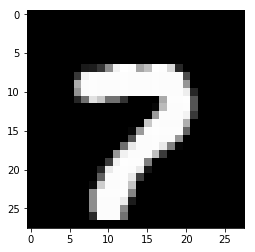

This number is:  7.0


In [7]:
idx = random.randint(0, test_x.shape[0]) # choose a number from 0 to 9999
plt.imshow(test_x[idx, :, :, 0], cmap='gray') # Display the image, use grayscale colormap because our image is grayscale
plt.show() # plt requires calling this function to make image actually show up

print 'This number is: ', test_y[idx, 0] # Print the corresponding label

Now it is your turn, load the training data (which contains 60000 images and labels), check the data shape, type, cales, etc. Play around with the data. Make sure that your training data is stored as variables train_x and train_y.

In [9]:
# TODO
train_x, train_y = load_ubyte('train-images-idx3-ubyte', 'train-labels-idx1-ubyte')
print train_x.shape
print train_y.shape
print train_x.dtype
print train_y.dtype
print train_x.max(), train_x.min()
print train_y.max(), train_y.min()


load train-images-idx3-ubyte ...
load train-labels-idx1-ubyte ...
(60000, 28, 28, 1)
(60000, 1)
uint8
float64
255 0
9.0 0.0


## 3. Data Augmentation
As mentioned in the presentation, this dataset is too "perfect" in the sense that it doesn't looks like what we will see in real camera frame. Specifically, in reality, the image you get from camera should contains background noises, different light conditions, overexposures, or the target doesn't aligned in the center, etc. So if you train the neural network directly on this dataset you cannot get a very rubost model.

That is why we need to do some manipulation on our dataset before feed them into the neural networks. Here are the operations we need to perform on the dataset: random shifting, random rotation, adding background noise, and more.

### 3.1 Random Shifting
We need to define a function that can perform a same operation on multiple images, so that later we can do data augmentation more convenient.

The idea here is to shift the digit by a small random offset. Please go to this [tutorial](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html) to learn the basics of geometry operations, specifically how to use *warpAffine* function to do translation (shifting). After that, implement random_shift function below, check the your result and make sure that the number don't shift too far:

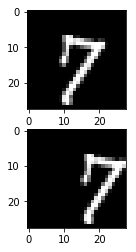

In [10]:
def random_shift(input_image):
    # TODO
    
    rows,cols = input_image.shape
    shift_x = random.randint(0,10)
    shift_y = random.randint(0,10)
    M = np.float32([[1,0,shift_x],[0,1,shift_y]])
    input_image = cv2.warpAffine(input_image,M,(cols,rows))
    
    return input_image

input_image = test_x[random.randint(0, 10000), :, :, 0] # select a random image
output_image = random_shift(input_image)
plt.subplot(211)
plt.imshow(input_image, cmap='gray')
plt.subplot(212)
plt.imshow(output_image, cmap='gray')
plt.show()

### 3.2 Random Rotation
Implement random_rotate function, this time rotate the input image by a small random angle. Again study *warpAffine* function to learn how to do rotation.

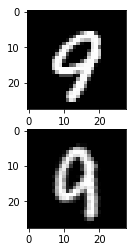

In [11]:
def random_rotate(input_image):
    # TODO
    
    rows,cols = input_image.shape

    rotate_degree = random.randint(0, 40)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),rotate_degree,1)
    input_image = cv2.warpAffine(input_image,M,(cols,rows))
    
    return input_image

input_image = test_x[random.randint(0, 10000), :, :, 0] # select a random image
output_image = random_rotate(input_image)
plt.subplot(211)
plt.imshow(input_image, cmap='gray')
plt.subplot(212)
plt.imshow(output_image, cmap='gray')
plt.show()

### 3.3 Add Random Noise
The idea here is that we generate a matrix of random numbers, and  add add this matrix to the input image. The key problem here is that you want to make sure that the value of the resuling image doesn't fall outsite of 0 to 255, otherwise the image won't display correctly. Read the following code carefully. Run the code and see the effects.

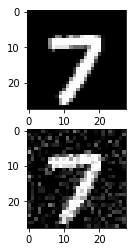

In [12]:
def add_noise(input_image):
    # Get image height and width:
    height, width = input_image.shape
    
    # Convert the image to float32 to allow arithmetic operations:
    input_image = input_image.astype(np.float32)
    
    # Generate a matrix of random number, the random numbers were drawn from normal distribution with mean and std:
    mean = 0.0
    std = 50.0
    noise = np.random.normal(mean, std, [height, width])
    
    # Add noise to the image:
    input_image += noise
    
    # Cut off out-of-range values by setting them equal to the bound:
    input_image[input_image < 0] = 0.0
    input_image[input_image > 255] = 255.0
    
    # Convert back to uint8 to allow displaying:
    input_image = input_image.astype(np.uint8)
    return input_image

input_image = test_x[random.randint(0, 10000), :, :, 0]
output_image = add_noise(input_image)
plt.subplot(211)
plt.imshow(input_image, cmap='gray')
plt.subplot(212)
plt.imshow(output_image, cmap='gray')
plt.show()

The last thing we need to do is to invert the image, because our input image should be black on white, this can be done simply by 255 minus all values in the image, thus it is important to make sure all values of image are within 0 to 255. Below is a small test that takes a random image and pass through all the transform functions we implemented, and invert the color in the end.

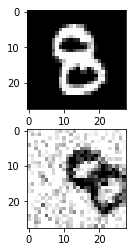

In [13]:
def invert_image(input_image):
    return 255 - input_image

input_image = test_x[random.randint(0, 10000), :, :, 0]
output_image = random_shift(input_image)
output_image = random_rotate(output_image)
output_image = add_noise(output_image)
output_image = invert_image(output_image)

plt.subplot(211)
plt.imshow(input_image, cmap='gray')
plt.subplot(212)
plt.imshow(output_image, cmap='gray')
plt.show()

Now we are ready to do data augmentation, the following script will take all training data and testing data, apply all the random transformations above, and generate an output dataset with transformed data. You can specify how many data you want, because the data is generated randomly, theoretically you can get infinitly amount of data, that is why this procedure is called data augmentation. But for this small task about 8000 training data and 2000 testing data should be sufficient.

In [14]:
def data_augmentation(input_images, input_labels, output_size):
    num, height, width, ch = input_images.shape
    output_images = np.zeros([output_size, height, width, 1], dtype=np.uint8)
    output_labels = np.zeros([output_size, 1], dtype=np.float32)
    for i in xrange(output_size):
        idx = random.randint(0, num)
        img = input_images[idx, :, :, 0]
        img = random_shift(img)
        img = random_rotate(img)
        img = add_noise(img)
        img = invert_image(img)
        output_images[i, :, :, 0] = img
        output_labels[i, 0] = input_labels[idx, 0]
    return output_images, output_labels

training_size = 8000
aug_train_x, aug_train_y = data_augmentation(train_x, train_y, training_size)

testing_size = 2000
aug_test_x, aug_test_y = data_augmentation(test_x, test_y, testing_size)

Next, we need to normalize the images (i.e. x) so that their values are within -1.0 to 1.0. This is especially important for features that have different scales, for example, some dataset may have x0 between 0.0 to 1.0 and x1 between -999999.0 to 999999.0, these kind of values will make the neural netwok very unstable, and very hard to train. Although for our dataset, all pixel values are ranging from 0 to 255, which have the same scale, it is usually good practice to re-scale their values before feeding into the neural network.

In [15]:
def normalize(x):
    # First convert x into float:
    ret = x.astype(np.float32)
    
    # We know the min value is 0 and the max value for x is 255,
    # so the calculation is straightforward:
    return ret / 255.0 * 2.0 - 1.0

aug_train_x = normalize(aug_train_x)
aug_test_x = normalize(aug_test_x)

# Check the max and min values:
print aug_train_x.max(), aug_train_x.min()
print aug_test_x.max(), aug_test_x.min()

1.0 -1.0
1.0 -1.0


There is one last thing before training, we need to convert the label (i.e. y) into "one hot" vector form. For example, if we have a vector \[0, 4, 1, 5\], then the corresponding "one hot" vector form is

\[

  \[1, 0, 0, 0, 0, 0, 0, 0, 0, 0\],

  \[0, 0, 0, 0, 1, 0, 0, 0, 0, 0\],
  
  \[0, 1, 0, 0, 0, 0, 0, 0, 0, 0\],
  
  \[0, 0, 0, 0, 0, 1, 0, 0, 0, 0\]
  
\]

This format is required for multi-class classifier in Tensorflow.

In [16]:
def convert_to_one_hot(y, num_class):
    num = y.shape[0]
    ret = np.zeros([num, num_class])
    for i in xrange(num):
        ret[i, int(y[i, 0])] = 1
    return ret

one_hot_train_y = convert_to_one_hot(aug_train_y, 10)
one_hot_test_y = convert_to_one_hot(aug_test_y, 10)

## 4. Training
Finally, we can start training our neural network on augmented dataset. Before starting, check the shape, scales, and type of aug_train_x and aug_test_x. You can also plot some random image to see if the format is correct.

In [ ]:
print aug_train_x.shape
print aug_test_x.shape
print one_hot_train_y.shape
print one_hot_test_y.shape

(8000, 28, 28, 1)
(2000, 28, 28, 1)
(8000, 10)
(2000, 10)


We will train a 2 layer convolutional neural network(CNN), if you want to know more about CNN there are lots of online tutorials like [cs231n](http://cs231n.stanford.edu/syllabus.html) or [udacity deep learning](https://www.udacity.com/course/deep-learning--ud730). The model is already implemented for you, so you can start training right away, but feel free to modify the neural network archietecture in ```./model.py``` and ```./layers.py```. You should see the loss decreases and the training accuracy increases over time. In the end, you should see the test accuracy slightly less than the training accuracy, but it should be greater than 80%.

In [ ]:
# Training Parameters:
learning_rate = 1e-3
max_iter = 2000
print_every = 50
batch_size = 100

# Optimizer (the objective for training is to minimize loss, which is defined in model.py):
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

# Launch Session:
sess = tf.InteractiveSession()

# This is used for saving the trained model:
saver = tf.train.Saver()

# Initialize all model variables:
sess.run(tf.global_variables_initializer())

# We are using mini-batch gradient descent, i.e. train the model on a
# small subset(a batch) for each step, because this can save lots of RAM
# while maintaining an acceptable accuracy.
def next_batch(x, y, batch_size):
    num_samples = x.shape[0]
    if batch_size > num_samples:
        raise ValueError('batch size cannot larger than data size')
    else:
        idx = range(num_samples)
        random.shuffle(idx)
        idx = idx[:batch_size]
        return x[idx, ...], y[idx, ...]

# Training:
for i in range(max_iter):
    batch = next_batch(aug_train_x, one_hot_train_y, batch_size)
    #print batch[0].shape, batch[1].shape
    if i%print_every == 0:
        train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1]})
        #print out_fc.eval(feed_dict={x: batch[0], y_:batch[1]})
        train_loss = loss.eval(feed_dict={x: batch[0], y_: batch[1]})
        #output = out_readout.eval(feed_dict={x: batch[0]})
        print 'step %d, loss %g, training accuracy: %g' %(i, train_loss, train_accuracy)
    train_step.run(feed_dict={
        x: batch[0], y_: batch[1]
        })
    
# Test the model on test set:
test_accuracy = accuracy.eval(feed_dict={x: aug_test_x, y_: one_hot_test_y})
print 'Test accuracy %g' %(test_accuracy)
    
# Save the trained model for real-time detector:
save_path = saver.save(sess, 'model/model.ckpt')
print 'model has been saved to', save_path

# Close the session:
sess.close()

step 0, loss 3.3893, training accuracy: 0.1
step 50, loss 2.02618, training accuracy: 0.29
step 100, loss 1.2642, training accuracy: 0.62
step 150, loss 1.15442, training accuracy: 0.61
step 200, loss 0.806177, training accuracy: 0.72
step 250, loss 0.631444, training accuracy: 0.79
step 300, loss 0.62504, training accuracy: 0.79
step 350, loss 0.373441, training accuracy: 0.85
step 400, loss 0.56171, training accuracy: 0.79
step 450, loss 0.410138, training accuracy: 0.83
step 500, loss 0.303232, training accuracy: 0.88
step 550, loss 0.283841, training accuracy: 0.93
step 600, loss 0.324855, training accuracy: 0.92
step 650, loss 0.272003, training accuracy: 0.96
step 700, loss 0.298199, training accuracy: 0.89
step 750, loss 0.223654, training accuracy: 0.95


## 5. Real-time Detection
After training, please close this notebook and run ```./real_time_detection.py```, this program will load the model you trained to do real-time number recognition. You should draw a number on paper or anything, and show that number to the camera, the prediction will be printed on the center of the screen. Please try multiple times, if you don't satisfy the result, please back here to modify the training parameters and/or data augmentation process and train the model again.